# Artificial Neural Network
# Nama : Yuan Nata Nugraha
# Nim : 09011381722120

# Pengertian dari cardiovascular

cardiovascular disease (CVD) adalah penyakit yang berkaitan dengan jantung dan pembuluh darah.[1] Penyakit kardiovaskular yang umum adalah: penyakit jantung iskemik (ischemic heart disease) (IHD), stroke, penyakit jantung akibat tekanan darah tinggi (hypertensive heart disease), penyakit jantung rematik (rheumatic heart disease) (RHD), pembesaran aorta (aortic aneurysm), cardiomyopathy, atrial fibrillation, penyakit jantung bawaan (congenital heart disease), endocarditis, dan peripheral artery disease (PAD)

# Import Library
1. numpy = Digunakan Untuk Menginput Array
2. sklearn.preprocessing = Digunakan Untuk Pemprosessan Data Pada GPU Atau CPU (Training, Test, Asli)
3. matplotlib.pyplot = Digunakan Untuk Membuat Grafik Dataset Yang Telah Valid
4. sklearn.Model_Selection = Digunakan Untuk Memilah Dataset Menjadi Data Training, Data Testing Dan Data Aslinya
5. keras.optimizers = Digunakan Untuk Mengoptimalkan Data Dengan Fungsi Adam
6. keras.Model = Digunakan Untuk Memasukkan Hidden Layers (Banyaknya Jalan Pada 1 Data Ke Data Yang Lain) Dengan Sequential
7. keras.Layers = Digunakan Untuk Banyaknya Hidden Layers Yang Digunakan Untuk 1 Data Set (Banyaknya Cara/Jalan)
8. keras.activations = Digunakan Untuk Mengubah Setiap Nilai Input Negatif Menjadi 0 Pada Grafik Sesegera 
9. keras.Utils = Digunakan Untuk Mengimport Categorical Y
10. pandas = Fungsinya Seperti Numpy, Namun Lebih Kearah Matriks Dengan Baris Dan Kolom Yang Telah Dimuat Dalam Bentuk Tabel
11. seaborn = Digubakan Untuk Visualisasi Data Secara Statistik

In [1]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.activations import relu
from keras.utils import np_utils
import pandas as pd
import seaborn as sns

Using TensorFlow backend.
C:\Users\yuann\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\yuann\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\yuann\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\yuann\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

### Import Dataset
Dataset yang digunakan adalah dataset yang di ambil dari kaggle dengan total 70001 baris

Dataset cardiovascular ini terdiri dari :
1. id=nomor penderita
2. age=umur
3. gender=jenis kelamin
4. height=tinggi
5. weight=berat badan
6. ap_hi
7. ap_lo
8. cholesterol=kolesterol
9. gluc=glukosa
10. smoke=perokok
11. alco=pecandu alkohol
12. active=aktif dalam kegiatan
13. cardio=rajin berolahraga

In [2]:
ds = np.loadtxt("cardio_train_dataset.csv", delimiter=';', dtype=float)
ds

array([[0.0000e+00, 1.8393e+04, 2.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [1.0000e+00, 2.0228e+04, 1.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        1.0000e+00],
       [2.0000e+00, 1.8857e+04, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       ...,
       [9.9996e+04, 1.9066e+04, 2.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        1.0000e+00],
       [9.9998e+04, 2.2431e+04, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [9.9999e+04, 2.0540e+04, 1.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00]])

Lalu kita input dataset kita dengan perintah pd.read

In [3]:
df = pd.read_csv("cardio_train.csv", delimiter =';')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


Memeriksa keseimbangan dataset

In [4]:
df.cardio.value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

### Set Data dan Target
Pembagian data:
1. Feature : Data untuk feature diambil dari kolom age sampai thal
2. Labels  : Data diambil dari kolom Target

In [5]:
features = ds[:, 0:12]
labels = ds[:, 12]

### Scaling
Scaling digunakan agar data tidak memiliki standat deviasi yang tinggi, dan data akan diukur ulang dimana nilainya paling minimal 0 dan paling maximal 1.

In [6]:
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

### Splitting Data
1. training_data = Inisialisasi Data Features Untuk Menjadi Data Training
2. testing_data = Inisialisasi Data Features Untuk Menjadi Data Testing
3. training_label = Inisialisasi Data Labels Untuk Menjadi Data Training
4. testing_label = Inisialisasi Data Labels Untuk Menjadi Data Testing
5. train_test_split () = Digunakan Untuk Memilah Data. Data Tersebut Akan Terbagi Menjadi Data Training Dan Data Testing Dari Data Features Dan Labels

In [7]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, shuffle=True, stratify=labels)

### Modelling
Model yang digunakan untuk membuat hidden layer dan memproses data adalah dengan menggunakan fungsi Sequential, sedangkan layer sendiri menggunakan tipe Dense yang melakukan teraining dengan menghubungkan setiap neural network secara sequential.

In [8]:
model = Sequential()
model.add(Dense(units= 50, input_dim = x_train.shape[1], activation=relu))
model.add(Dense(units= 50, activation=relu))
model.add(Dense(units= 50, activation=relu))
model.add(Dropout(0.5))
model.add(Dense(units= 1, activation='sigmoid'))
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.save('model.h5')

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Fit Model digunakan untuk mendapatkan hasil akurasi dan loss dari dataset, langkah selanjutnya yang harus dilakukan adalah fit model.

In [9]:
proses=model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=1000, epochs=150)


Train on 56000 samples, validate on 14000 samples
Epoch 1/150
56000/56000 [==============================] - 2s 38us/step - loss: 0.6684 - accuracy: 0.5924 - val_loss: 0.6465 - val_accuracy: 0.6273
Epoch 2/150
56000/56000 [==============================] - 0s 6us/step - loss: 0.6482 - accuracy: 0.6253 - val_loss: 0.6362 - val_accuracy: 0.6356
Epoch 3/150
56000/56000 [==============================] - 0s 6us/step - loss: 0.6405 - accuracy: 0.6339 - val_loss: 0.6326 - val_accuracy: 0.6389
Epoch 4/150
56000/56000 [==============================] - 0s 7us/step - loss: 0.6370 - accuracy: 0.6408 - val_loss: 0.6300 - val_accuracy: 0.6432
Epoch 5/150
56000/56000 [==============================] - 0s 6us/step - loss: 0.6343 - accuracy: 0.6429 - val_loss: 0.6280 - val_accuracy: 0.6456
Epoch 6/150
56000/56000 [==============================] - 0s 6us/step - loss: 0.6325 - accuracy: 0.6433 - val_loss: 0.6263 - val_accuracy: 0.6462
Epoch 7/150
56000/56000 [==============================] - 0s 6us/

Epoch 55/150
56000/56000 [==============================] - 0s 6us/step - loss: 0.5938 - accuracy: 0.6889 - val_loss: 0.5856 - val_accuracy: 0.6971
Epoch 56/150
56000/56000 [==============================] - 0s 6us/step - loss: 0.5966 - accuracy: 0.6867 - val_loss: 0.5888 - val_accuracy: 0.6915
Epoch 57/150
56000/56000 [==============================] - 0s 6us/step - loss: 0.5938 - accuracy: 0.6914 - val_loss: 0.5947 - val_accuracy: 0.6829
Epoch 58/150
56000/56000 [==============================] - 0s 5us/step - loss: 0.5945 - accuracy: 0.6886 - val_loss: 0.5860 - val_accuracy: 0.6964
Epoch 59/150
56000/56000 [==============================] - 0s 6us/step - loss: 0.5927 - accuracy: 0.6916 - val_loss: 0.5811 - val_accuracy: 0.7061
Epoch 60/150
56000/56000 [==============================] - 0s 6us/step - loss: 0.5875 - accuracy: 0.6993 - val_loss: 0.5782 - val_accuracy: 0.7091
Epoch 61/150
56000/56000 [==============================] - 0s 6us/step - loss: 0.5865 - accuracy: 0.6974 - val_

Setelah data di training, lalu data dapat dievaluasi melalui proses evaluasi model dan hasil dari akurasi akan dapat ditampilkan.

In [10]:
scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

14000/14000 [==============================] - 0s 26us/step

accuracy: 72.57%


Akurasi yang didapatkan adalah sebesar 72.57%

### Visualisasi
Data yang telah ditraining melalui epochs dapat ditampilkan dalam bentuk grafik (plot model). Grafik yang ditampilkan ada dua buah grafik. Grafik pertama menampilkan Akurasi dan grafik kedua menampilkan Loss.

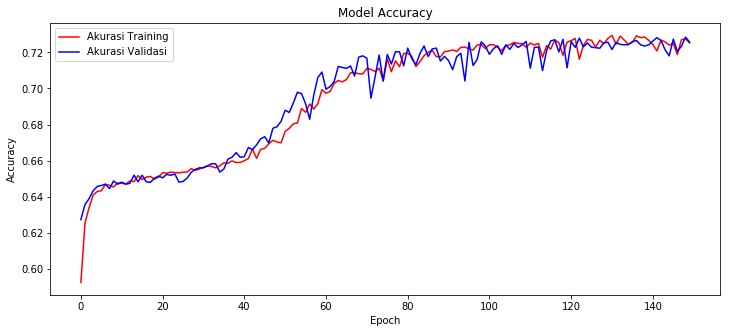

In [11]:
fig,(ax0) = plt.subplots(nrows=1, figsize=(12,5))
ax0.plot(proses.history['accuracy'],'red', label='Akurasi Training')
ax0.plot(proses.history['val_accuracy'], 'blue', label='Akurasi Validasi')
ax0.plot(label='Accuracy', loc='upper left')
ax0.set_title('Model Accuracy')
ax0.set_xlabel("Epoch")
ax0.set_ylabel("Accuracy")
ax0.legend()
plt.savefig('Grafik Akurasi.png')

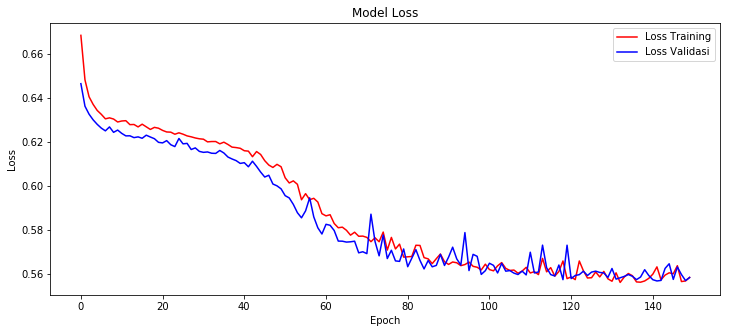

In [12]:
fig,(ax1) = plt.subplots(nrows=1, figsize=(12,5))
ax1.plot(proses.history['loss'],'red', label='Loss Training')
ax1.plot(proses.history['val_loss'], 'blue', label='Loss Validasi')
ax1.plot(label='Loss', loc='upper left')
ax1.set_title('Model Loss')
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend()
plt.savefig('Grafik Loss.png')

### Confusion matrix 
adalah suatu metode yang biasanya digunakan untuk melakukan perhitungan akurasi pada konsep data mining. Rumus ini melakukan perhitungan dengan 4 keluaran, yaitu: recall, precision, acuraccy dan error rate.

Confusion Matriks memiliki 4 instilah yaitu

    -True Positif
    -False Positif
    -False Negative
    -True Negativ
    
    
1. True Positives (TP): True positif adalah kasus ketika kelas sebenarnya dari titik data adalah 1 (Benar) dan prediksi juga 1 (Benar)

2. Negatif Benar (TN): True Negatif adalah kasus ketika kelas sebenarnya dari titik data adalah 0 (Salah) dan prediksi juga 0 (Salah

3. Salah Positif (FP): False positif adalah kasus ketika kelas sebenarnya dari titik data adalah 0 (Salah) dan yang diprediksi adalah 1 (Benar).

4. Negatif Palsu (FN): False Negatif adalah kasus ketika kelas sebenarnya dari titik data adalah 1 (Benar) dan prediksi adalah 0 (Salah)..

In [13]:
training_predicted = model.predict(x_train)
testing_predicted = model.predict(x_test)

Lalu masukkan deklarasi sklearn.metrics yang berfungsi sebagai penghitung Confusion Matrix dan deklarasikan lagi data training dan data testing dalam bentuk Confusion Matrix

In [14]:
from sklearn.metrics import confusion_matrix

training_cm = confusion_matrix(y_train,training_predicted.round())
testing_cm = confusion_matrix(y_test,testing_predicted.round())

Confusion Matrix dari data training

In [19]:
training_cm

array([[22054,  5963],
       [ 8944, 19039]], dtype=int64)

Lalu hitung setiap Nilai Confusion Matrix dengan menggunakan rumus Accuracy, Specificity, Sensitivity, Precision, dan F1 Score

In [16]:
tp = training_cm[0][0]
fn = training_cm[0][1]
fp = training_cm[1][0]
tn = training_cm[1][1]

accuracy = (tp+tn)/(tp+tn+fp+fn)
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)
precision = tp/(tp+fp)
f1_score = (2*sensitivity*precision)/(sensitivity+precision)

print("Accuracy training {0}".format(accuracy))
print("Specificity training {0}".format(specificity))
print("Sensitivity training {0}".format(sensitivity))
print("Precision training {0}".format(precision))
print("F1 Score training {0}".format(f1_score))

Accuracy training 0.7338035714285714
Specificity training 0.6803773719758425
Sensitivity training 0.7871649355748296
Precision training 0.7114652558229563
F1 Score training 0.7474032025756163


Confusion Matrix dari data testing

In [17]:
print(testing_cm)

[[5471 1533]
 [2307 4689]]


Kemudian hitung setiap Nilai Confusion Matrix dengan menggunakan rumus Accuracy, Specificity, Sensitivity, Precision, dan F1 Score

In [18]:
tp = testing_cm[0][0]
fn = testing_cm[0][1]
fp = testing_cm[1][0]
tn = testing_cm[1][1]

accuracy = (tp+tn)/(tp+tn+fp+fn)
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)
precision = tp/(tp+fp)
f1_score = (2*sensitivity*precision)/(sensitivity+precision)

print("Accuracy testing {0}".format(accuracy))
print("Specificity testing {0}".format(specificity))
print("Sensitivity testing {0}".format(sensitivity))
print("Precision testing {0}".format(precision))
print("F1 Score testing {0}".format(f1_score))

Accuracy testing 0.7257142857142858
Specificity testing 0.6702401372212693
Sensitivity testing 0.7811250713877784
Precision testing 0.7033941887374646
F1 Score testing 0.7402245974834257


Diatas adalah hasil dari kalkulasi Confusion Matrix untuk data testing

### Kesimpulan
Dataset Cardiovascular yang memiliki 70001 baris dari data kaggle memiliki akurasi sebesar 72.54% saat diolah dengan menggunakan Artificial Neural Network.

### Referensi
1. Paper [Kidney Disease as a Risk Factor for Development of Cardiovascular Disease](https://www.ahajournals.org/doi/pdf/10.1161/01.CIR.0000095676.90936.80)
2. Dataset [Cardiovascular factor risk](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset/download/lFCtlrBySQEGm0VBVHLv%2Fversions%2F40V9qH7z2bTsP9V9cAsZ%2Ffiles%2Fcardio_train.csv?datasetVersionNumber=1)